In [1]:
from pathlib import Path

# Get the current notebook's directory
CURRENT_NOTEBOOK_DIR = Path().resolve()

# Assume project root is one level up from notebooks/
BASE_DIR = CURRENT_NOTEBOOK_DIR.parent.parent

# Define path to the data file
RAW_DATA_PATH = BASE_DIR / "Data_Gathering" / "City_Data" / "Gurgaon" / "Feature_Engineering"

# # Load the data
# import pandas as pd
# df = pd.read_csv(RAW_DATA_PATH)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# To print sare rows and columns

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [4]:
df_fe = pd.read_csv(RAW_DATA_PATH/"gurgaon_properties_after_featureEng.csv").drop_duplicates()
df_fe

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,1,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,1,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,1,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3798,flat,pivotal devaan,sector 84,0.37,6346.0,583.0,Super Built up area 583(54.16 sq.m.)Carpet are...,2,2,1,...,583.0,NaN,483.0,0,0,0,0,0,1,73
3799,house,international city by sobha phase 1,sector 109,6.00,9634.0,6228.0,Plot area 692(578.6 sq.m.),5,5,3+,...,NaN,6228.0,NaN,1,1,1,1,0,1,160
3800,flat,ansal api celebrity suites,sector 2,0.60,8163.0,735.0,Super Built up area 735(68.28 sq.m.),1,1,1,...,735.0,NaN,NaN,0,0,0,0,0,2,67
3801,house,independent,sector 43,15.50,28233.0,5490.0,Plot area 610(510.04 sq.m.),5,6,3,...,NaN,5490.0,NaN,1,1,1,1,0,1,76


In [5]:
df_fe.shape

(3677, 23)

In [6]:
df_fe.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'study room', 'servant room', 'store room', 'pooja room', 'others',
       'furnishing_type', 'luxury_score'],
      dtype='object')

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\2348566089.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fe['price'])


<Axes: xlabel='price', ylabel='Density'>

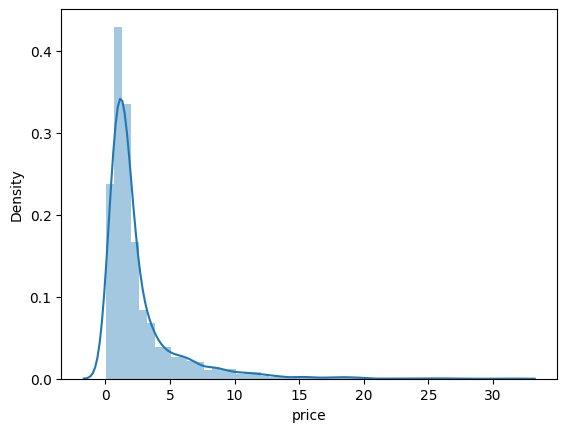

In [9]:
# outliers on the basis of price column
sns.distplot(df_fe['price'])

<Axes: xlabel='price'>

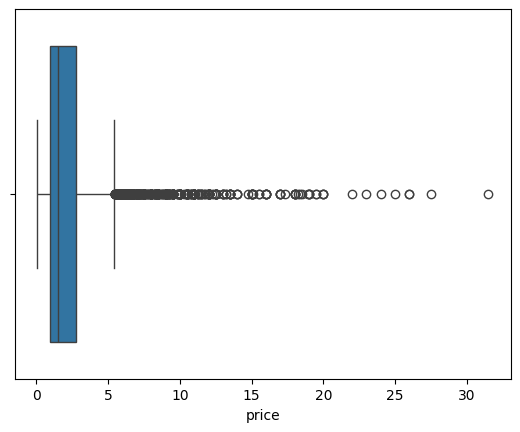

In [10]:
sns.boxplot(x=df_fe['price'])

In [11]:
# Calculate the IQR for the 'price' column
Q1 = df_fe['price'].quantile(0.25)
Q3 = df_fe['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_fe[(df_fe['price'] < lower_bound) | (df_fe['price'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price'].describe()

num_outliers, outliers_price_stats

(425,
 count    425.000000
 mean       9.235624
 std        4.065259
 min        5.460000
 25%        6.460000
 50%        8.000000
 75%       10.750000
 max       31.500000
 Name: price, dtype: float64)

In [12]:
outliers.sort_values('price',ascending=False).head(20)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
821,house,arjun marg/ sector- 26 phase- 1/ golf course road,sector 26,31.50,35000.0,9000.0,Plot area 1000(836.13 sq.m.),7,9,3+,...,NaN,9000.0,NaN,1,1,1,1,0,0,74
2834,house,independent,sector 43,27.50,24366.0,11286.0,Plot area 1254(1048.5 sq.m.),6,7,3+,...,NaN,11286.0,NaN,1,1,0,1,1,2,42
2488,house,dlf city plots,sector 26,26.00,57206.0,4545.0,Plot area 505(422.24 sq.m.),6,7,3+,...,NaN,4545.0,NaN,1,1,0,1,1,2,138
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,NaN,400.0,350.0,1,1,1,1,0,2,72
1686,house,suncity township,sector 54,25.00,31111.0,8036.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,1000.0,NaN,1,1,1,1,0,1,0
3046,house,emaar the palm springs,sector 54,24.00,600000.0,400.0,Plot area 400(37.16 sq.m.),5,5,2,...,NaN,400.0,NaN,1,1,0,1,0,2,122
2765,house,independent,sector 26,23.00,25556.0,9000.0,Plot area 1000(836.13 sq.m.),4,4,3+,...,NaN,9000.0,NaN,1,1,1,1,0,2,145
2667,house,vipul tatvam villa,sector 48,22.00,26667.0,8250.0,Plot area 1000(836.13 sq.m.),5,6,3,...,NaN,1000.0,NaN,0,1,0,0,0,1,54
874,house,dlf city plots,sector 26,20.00,44265.0,4518.0,Plot area 502(419.74 sq.m.),16,20,3+,...,NaN,4518.0,NaN,1,1,1,1,0,2,153
2096,house,luxury dlf city floors,sector 26,20.00,48889.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,...,NaN,500.0,NaN,0,1,0,0,0,2,31


On the basis of price col we can say that there are some genuine outliers but there are some data erros as well

### Price_per_sqft

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\2927975517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fe['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

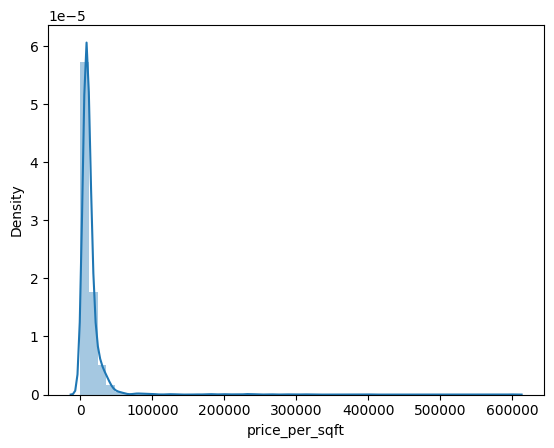

In [13]:
sns.distplot(df_fe['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

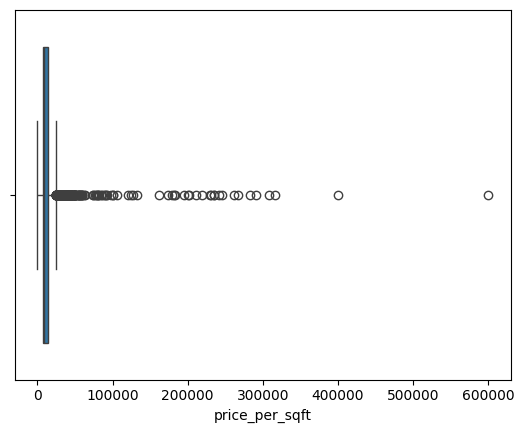

In [14]:
sns.boxplot(x=df_fe['price_per_sqft'])

In [15]:
# Calculate the IQR for the 'price' column
Q1 = df_fe['price_per_sqft'].quantile(0.25)
Q3 = df_fe['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df_fe[(df_fe['price_per_sqft'] < lower_bound) | (df_fe['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(354,
 count       354.000000
 mean      52592.612994
 std       61150.458507
 min       24489.000000
 25%       28208.250000
 50%       33368.500000
 75%       41982.250000
 max      600000.000000
 Name: price_per_sqft, dtype: float64)

In [16]:
outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\205471443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['area'] = outliers_sqft['area'].apply(lambda x:x*9 if x<1000 else x)


In [17]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\3686006548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price']*10000000)/outliers_sqft['area'])


In [18]:
outliers_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [19]:
df_fe.update(outliers_sqft)

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\2927975517.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fe['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

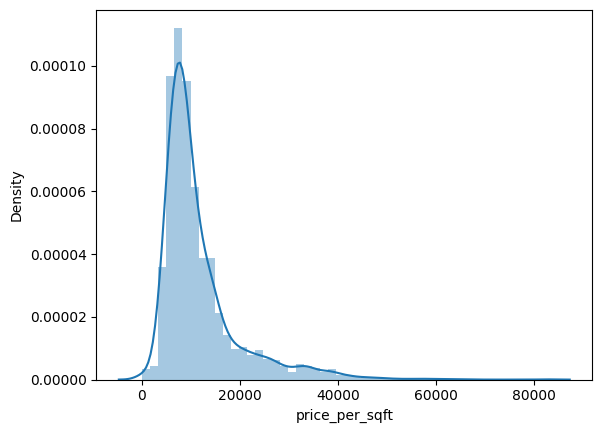

In [20]:
sns.distplot(df_fe['price_per_sqft'])

<Axes: xlabel='price_per_sqft'>

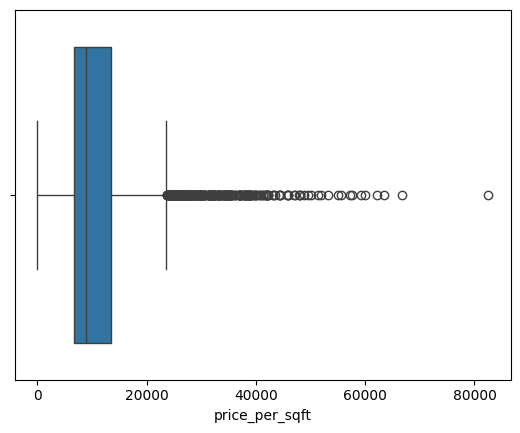

In [21]:
sns.boxplot(x=df_fe['price_per_sqft'])

In [22]:
df_fe[df_fe['price_per_sqft']>50000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
386,house,cloudnine cottages,sohna road road,5.50,55000.0,1000.0,Plot area 1000(92.9 sq.m.),3,3,0,...,NaN,1000.0,NaN,0,0,0,0,0,1,0
671,house,emaar mgf marbella,sector 66,18.00,55556.0,3240.0,Plot area 360(301.01 sq.m.),4,4,3+,...,NaN,3240.0,NaN,1,1,0,1,0,0,75
1200,house,independent,sector 26,14.75,51864.0,2844.0,Plot area 316(264.22 sq.m.),16,20,3+,...,NaN,2844.0,NaN,1,1,1,1,0,2,153
1261,house,independent,sector 25,16.00,59259.0,2700.0,Plot area 350(292.64 sq.m.)Built Up area: 325 ...,16,16,3+,...,NaN,325.0,300.0,1,1,1,1,0,2,72
1349,flat,unitech vistas,sector 70,9.00,57508.0,1565.0,Built Up area: 1565 (145.39 sq.m.),3,3,0,...,NaN,1565.0,NaN,0,0,0,0,0,1,0
1425,house,project housing board colony,sector 31,8.00,63492.0,1260.0,Built Up area: 140 (117.06 sq.m.),2,1,0,...,NaN,140.0,NaN,0,0,0,0,0,1,0
1640,house,emaar the palm springs,sector 54,14.00,62222.0,2250.0,Plot area 250(209.03 sq.m.),4,5,3+,...,NaN,2250.0,NaN,1,1,0,0,0,2,160
1839,house,unitech escape,sector 50,10.80,60000.0,1800.0,Plot area 290(242.48 sq.m.)Built Up area: 250 ...,4,4,3,...,NaN,250.0,200.0,1,1,1,1,0,2,103
2211,house,independent,sector 26,26.00,82540.0,3150.0,Plot area 402(336.12 sq.m.)Built Up area: 400 ...,16,16,3+,...,NaN,400.0,350.0,1,1,1,1,0,2,72
2290,house,malibu towne,sector 47,8.50,53125.0,1600.0,Built Up area: 1600 (148.64 sq.m.),12,12,3+,...,NaN,1600.0,NaN,0,0,0,0,0,2,99


In [23]:
df_fe = df_fe[df_fe['price_per_sqft'] <= 50000]

<Axes: xlabel='price_per_sqft'>

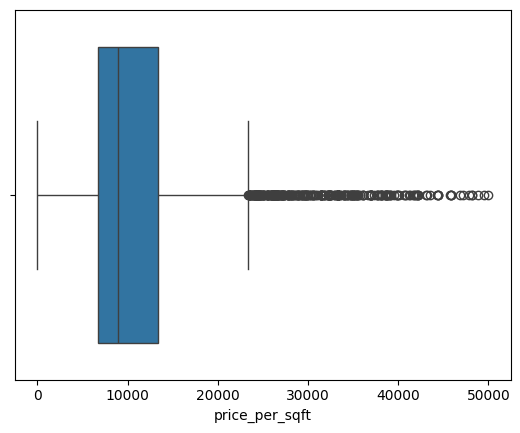

In [24]:
sns.boxplot(x=df_fe['price_per_sqft'])

### Column: Area

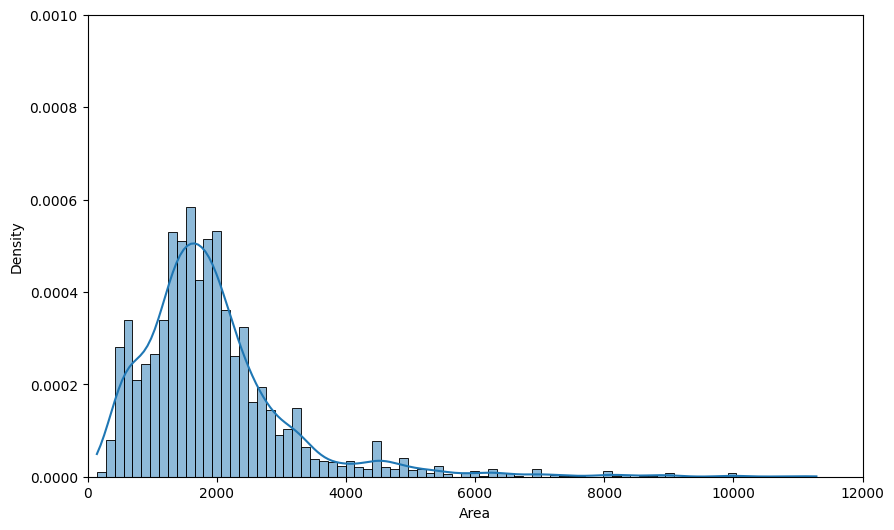

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fe[df_fe['area'] <= 12000],x='area',kde=True,stat='density')
plt.ylim(0, 0.0010)  # Limit y-axis (density)
plt.xlim(0, 12000)   # Limit x-axis (area)
plt.xlabel("Area")
plt.ylabel("Density")
plt.show()


<Axes: xlabel='area'>

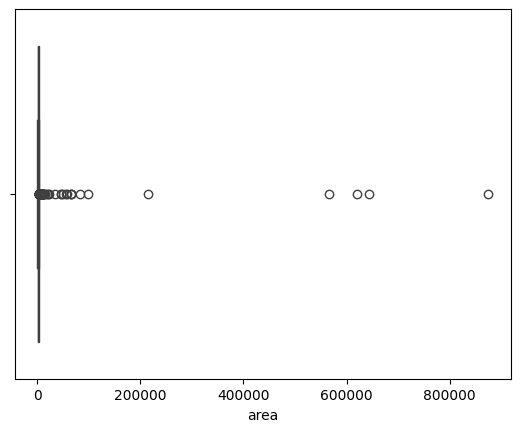

In [30]:
sns.boxplot(x=df_fe['area'])

In [31]:
df_fe['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

In [32]:
df_fe[df_fe['area'] > 100000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.0,0,0,0,0,0,1,44
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,0,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.0,0,0,0,0,0,1,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.0,1,0,0,0,1,1,65
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,2,0


C:\Users\hp\AppData\Local\Temp\ipykernel_16692\2828406844.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fe['area'])


<Axes: xlabel='area', ylabel='Density'>

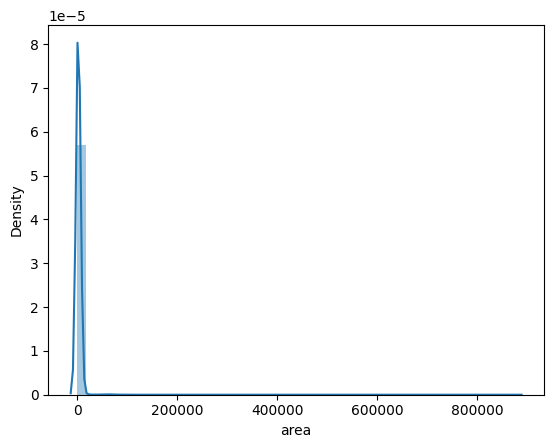

In [41]:
sns.distplot(df_fe['area'])

<Axes: xlabel='area'>

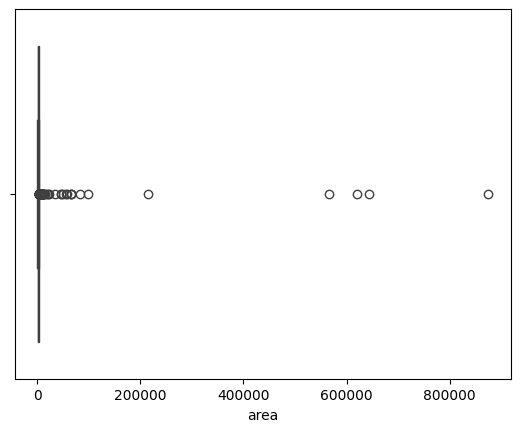

In [44]:
sns.boxplot(x=df_fe['area'])

In [45]:
df_fe[df_fe['area'] > 10000].sort_values('area',ascending=False)

# 818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,0,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.00,0,0,0,0,0,1,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.00,1,0,0,0,1,1,65
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.00,0,0,0,0,0,1,44
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,2,0
818,house,independent,sector 26,18.40,1859.0,98978.0,Plot area 502(419.74 sq.m.)Carpet area: 11000 ...,6,8,3+,...,NaN,NaN,11000.00,0,1,1,1,0,2,60
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,1,7
1796,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64529 (5994.94 sq.m.),2,2,2,...,NaN,NaN,64529.00,1,0,0,0,0,1,15
1123,flat,rof ananda,sector 95,0.38,58.0,65517.0,Carpet area: 64412 (5984.07 sq.m.),3,2,1,...,NaN,NaN,64412.00,0,0,0,0,0,1,51
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,1,0


In [46]:
df_fe.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\2542873060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fe.drop(index=[818, 1796, 1123, 2, 2356, 115, 3649, 2503, 1471], inplace=True)


In [47]:
df_fe[df_fe['area'] > 10000].sort_values('area',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1648,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,...,NaN,737147.0,NaN,0,0,0,0,0,0,44
2111,flat,signature the roselia,sector 95,0.45,7.0,642857.0,Carpet area: 569243 (52884.41 sq.m.),2,2,2,...,NaN,NaN,569243.00,0,0,0,0,0,1,76
2651,flat,ramsons kshitij,sector 95,0.31,5.0,620000.0,Carpet area: 607936 (56479.1 sq.m.),2,2,1,...,NaN,NaN,607936.00,1,0,0,0,1,1,65
1638,flat,signature global solera 2,sector 107,0.51,9.0,566667.0,Carpet area: 514396 (47788.95 sq.m.),2,2,1,...,NaN,NaN,514396.00,0,0,0,0,0,1,44
3021,house,independent,sector 50,5.00,232.0,215517.0,Plot area 2(1011.71 sq.m.),6,5,3+,...,NaN,2.0,NaN,1,1,0,1,1,2,0
48,house,ganpati heights apartment,sector 13,1.25,151.0,82781.0,Plot area 115(7692.86 sq.m.),10,6,2,...,NaN,115.0,NaN,0,0,0,0,1,1,7
300,house,dlf city plot phase 4,sector 28,13.00,1992.0,65261.0,Carpet area: 7250 (6061.92 sq.m.),10,10,3+,...,NaN,NaN,7250.00,0,0,0,0,0,1,0
2666,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.00,0,1,1,0,0,2,109
1358,house,independent,sector 57,6.25,2778.0,22498.0,Plot area 3100(2591.99 sq.m.)Built Up area: 26...,9,9,3+,...,NaN,2660.0,2500.00,0,1,0,0,0,2,61
3195,house,independent,sector 43,5.50,2716.0,20250.0,Plot area 215(179.77 sq.m.)Built Up area: 2850...,8,7,3+,...,NaN,2850.0,2250.00,1,1,0,1,1,2,123


In [48]:
df_fe.loc[48,'area'] = 115*9
df_fe.loc[300,'area'] = 7250
df_fe.loc[2666,'area'] = 5800
df_fe.loc[1358,'area'] = 2660
df_fe.loc[3195,'area'] = 2850
df_fe.loc[2131,'area'] = 1812
df_fe.loc[3088,'area'] = 2160
df_fe.loc[3444,'area'] = 1175

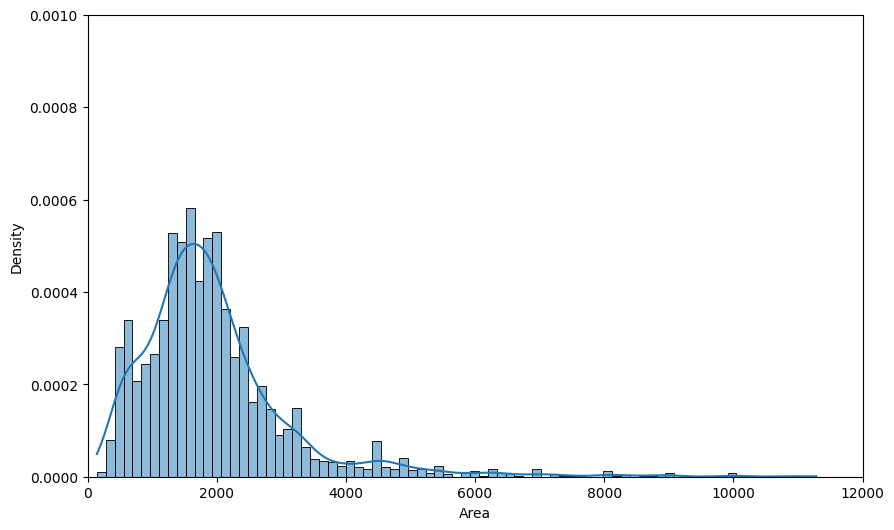

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_fe[df_fe['area'] <= 12000],x='area',kde=True,stat='density')
plt.ylim(0, 0.0010)  # Limit y-axis (density)
plt.xlim(0, 12000)   # Limit x-axis (area)
plt.xlabel("Area")
plt.ylabel("Density")
plt.show()


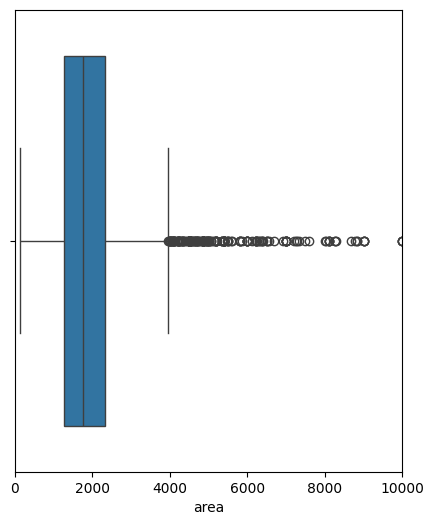

In [56]:
plt.figure(figsize=(5, 6))
sns.boxplot(x=df_fe['area'])
plt.xlim(0,10000)
plt.show()

In [57]:
df_fe['area'].describe()

count      3638.000000
mean       2750.326553
std       22991.299829
min         145.000000
25%        1261.000000
50%        1750.000000
75%        2336.750000
max      875000.000000
Name: area, dtype: float64

### Bedroom

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\2410185144.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fe['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

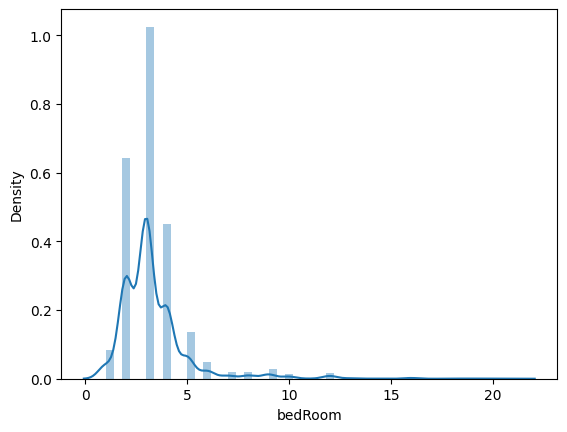

In [58]:
sns.distplot(df_fe['bedRoom'])

<Axes: xlabel='bedRoom'>

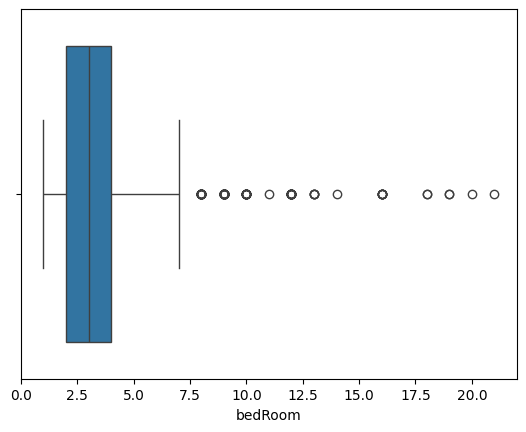

In [59]:
sns.boxplot(x=df_fe['bedRoom'])

In [60]:
df_fe['bedRoom'].describe()

count    3638.000000
mean        3.332875
std         1.829845
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        21.000000
Name: bedRoom, dtype: float64

In [61]:
df_fe[df_fe['bedRoom'] > 10].sort_values('bedRoom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3618,house,independent,sector 54,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21,21,3+,...,NaN,1161.0,NaN,0,1,0,0,0,0,49
2611,house,independent,sector 43,4.50,39062.0,1152.0,Plot area 128(107.02 sq.m.),20,20,3+,...,NaN,1152.0,NaN,0,1,0,0,0,0,22
1493,house,independent,sector 17a,3.93,24214.0,1623.0,Plot area 1623(150.78 sq.m.)Built Up area: 162...,19,17,3,...,NaN,1622.0,NaN,1,1,1,1,0,1,74
78,house,independent,sector 17a,3.87,5160.0,7500.0,Plot area 1623(150.78 sq.m.)Built Up area: 750...,19,17,3+,...,NaN,7500.0,NaN,1,0,1,0,0,1,68
19,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,...,NaN,1440.0,NaN,0,1,0,0,0,0,70
1381,house,private house,sector 55,7.05,46906.0,1503.0,Plot area 167(139.63 sq.m.),18,18,3+,...,NaN,1503.0,NaN,0,0,0,0,1,0,57
2096,house,luxury dlf city floors,sector 26,20.00,48888.0,4091.0,Plot area 500(418.06 sq.m.),16,16,3+,...,NaN,500.0,NaN,0,1,0,0,0,2,31
3457,house,independent,sector 56,12.39,45889.0,2700.0,Plot area 300(250.84 sq.m.),16,18,3+,...,NaN,2700.0,NaN,0,1,0,1,0,2,49
2137,house,independent,sector 40,12.00,38986.0,3078.0,Plot area 342(285.96 sq.m.),16,16,3+,...,NaN,3078.0,NaN,1,1,1,1,0,2,0
2039,house,independent,sector 43,13.50,50000.0,2700.0,Plot area 300(250.84 sq.m.),16,16,3+,...,NaN,2700.0,NaN,1,1,0,1,1,1,41


In [62]:
df_fe = df_fe[df_fe['bedRoom'] <= 10]

In [64]:
df_fe.shape

(3593, 23)

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\2410185144.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fe['bedRoom'])


<Axes: xlabel='bedRoom', ylabel='Density'>

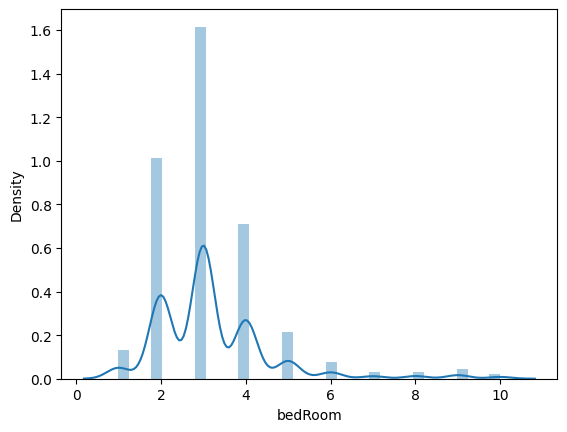

In [65]:
sns.distplot(df_fe['bedRoom'])

<Axes: xlabel='bedRoom'>

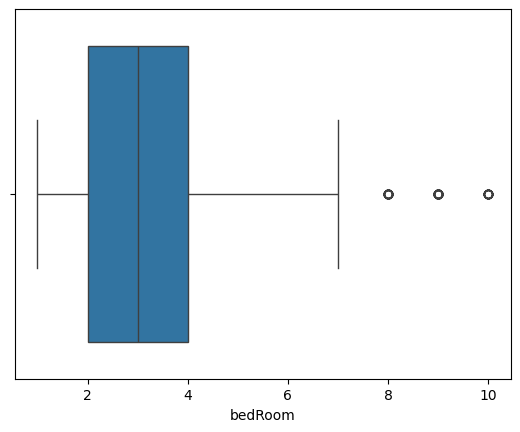

In [67]:
sns.boxplot(x=df_fe['bedRoom'])

In [69]:
df_fe['bedRoom'].describe()

count    3593.000000
mean        3.203173
std         1.394357
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: bedRoom, dtype: float64

### Bathroom

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\1085481120.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_fe['bathroom'])


<Axes: ylabel='Density'>

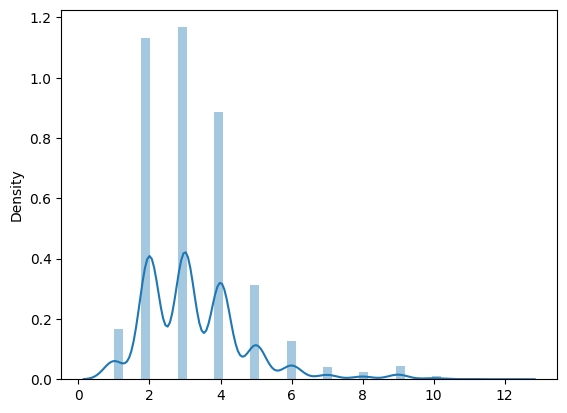

In [71]:
sns.distplot(x = df_fe['bathroom'])

<Axes: xlabel='bathroom'>

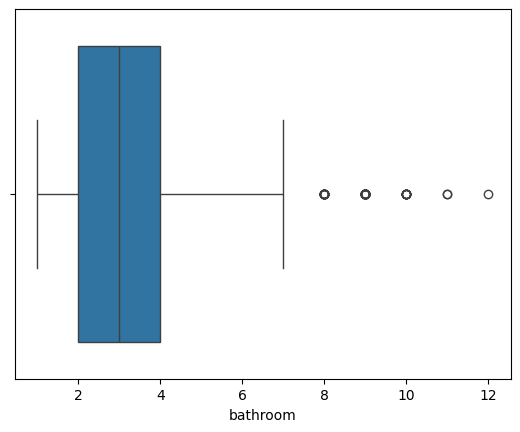

In [72]:
sns.boxplot(x=df_fe['bathroom'])

In [73]:
df_fe[df_fe['bathroom'] > 10].sort_values('bathroom',ascending=False)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3267,house,adani brahma samsara,sector 60,18.02,28200.0,6390.0,Built Up area: 6390 (593.65 sq.m.),9,12,3+,...,NaN,6390.0,NaN,0,1,0,0,0,2,146
2771,house,independent,sector 39,7.00,10000.0,7000.0,Plot area 350(32.52 sq.m.)Built Up area: 7000 ...,10,11,3+,...,NaN,7000.0,NaN,0,0,0,1,0,2,38
2816,house,independent,sector 24,11.00,28902.0,3806.0,Plot area 3806.45(353.63 sq.m.)Built Up area: ...,8,11,3+,...,NaN,5000.0,NaN,1,1,0,1,1,2,39


In [75]:
df_fe.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,1,38
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,1,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,2,174
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,...,632.0,NaN,532.0,0,0,1,0,0,1,159


### super built up area

C:\Users\hp\AppData\Local\Temp\ipykernel_16692\1476514197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fe['super_built_up_area'])


<Axes: xlabel='super_built_up_area', ylabel='Density'>

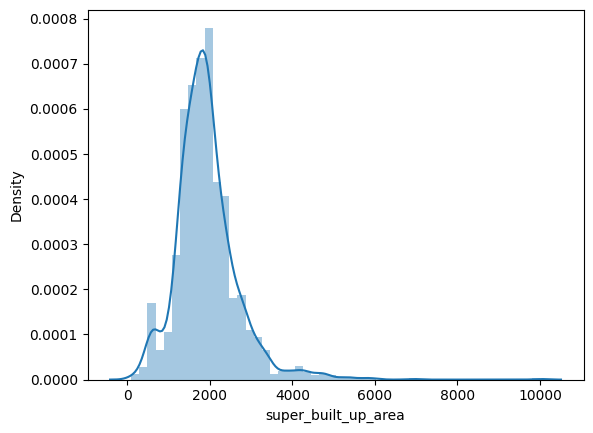

In [76]:
sns.distplot(df_fe['super_built_up_area'])

<Axes: xlabel='super_built_up_area'>

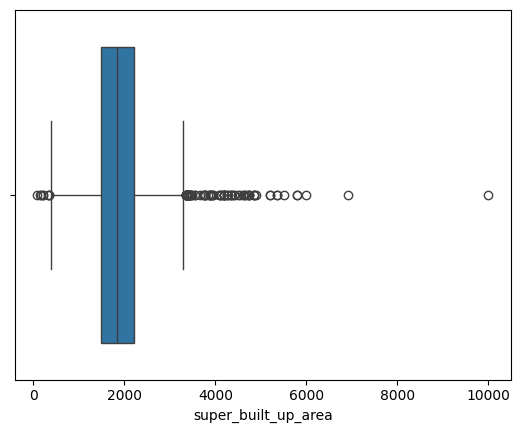

In [77]:
sns.boxplot(x=df_fe['super_built_up_area'])

In [78]:
df_fe['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [79]:
df_fe[df_fe['super_built_up_area'] > 6000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1323,flat,bestech park view grand spa,sector 81,4.7,6786.0,6926.0,Super Built up area 6926(643.45 sq.m.),4,4,3+,...,6926.0,NaN,NaN,0,1,0,0,0,2,140
3265,flat,krrish provence estate,gwal pahari,7.5,7500.0,10000.0,Super Built up area 10000(929.03 sq.m.),5,6,3+,...,10000.0,NaN,NaN,0,1,0,1,1,1,49


### built up area

(0.0, 0.0005)

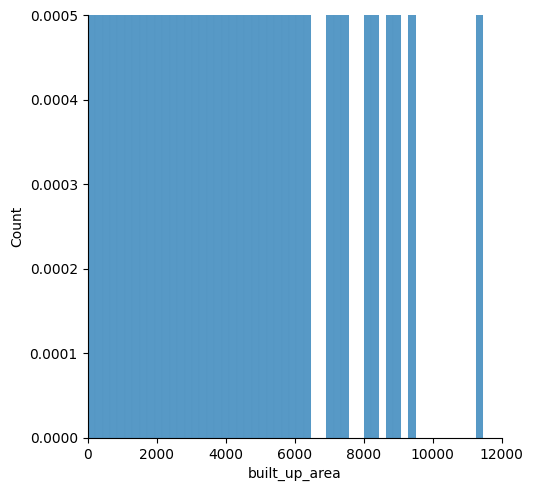

In [89]:
sns.displot(x = df_fe['built_up_area'])
plt.xlim(0,12000)
plt.ylim(0,0.0005)

(0.0, 10000.0)

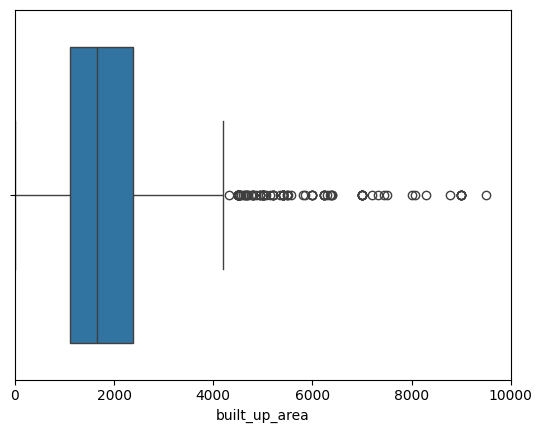

In [92]:
sns.boxplot(x=df_fe['built_up_area'])
plt.xlim(0,10000)